<a href="https://colab.research.google.com/github/jyj0607040607/AIStudy24/blob/master/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

인공신경망을 구성하는 절차


1.   더미데이터 준비
2.   훈련용, 검증용, 테스트용으로 나눈다.
3.   심층을 만든다(dense)
4.   model에 적용
5.   컴파일 진행 (최적화기법을 적용 : adam)
6.   fit(훈련)
7.   evaluate(검증)


손실곡선 : fit() 메서드로 모델을 훈련하는 동안 훈련과정이 상세하게 출력되어 확인 할수 있다.

*  에포크 횟수, 손실, 정확도
*  아래쪽에 <keras.src.callbacks.history.History at 0x79d5e6862890> 이 출력 메시지가 나온다.
*  코렙 노트북에 코드셀은 print() 명령어를 사용하지 않아도 마지막 라인에 실행결과를 자동으로 출력된다.

다시말해 pit() 메서드는 History라는 클래스 객체를 반환한다.
*  훈련과정의 지표, 손실, 정확도등 내장

이 값을 잘 활용하면 그래프를 그릴 수 있다.

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
      keras.datasets.fashion_mnist.load_data()
# 인터효과 제거용 \ -> 한줄로 긴 문장을 자름

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(train_scaled.shape,train_target.shape)

(48000, 28, 28) (48000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


In [4]:
print(val_scaled.shape, val_target.shape)

(12000, 28, 28) (12000,)


In [5]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))

    # model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 하나의 층을 추가함.
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [6]:
model = model_fn()    # 위에서 만든 메서드 호출하여 모델에 담았다.

model.summary()     # 모델의 요약정보를 본다.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#                     다중분류                                  정확도

In [8]:
# fit() 메서드 결과를 history 변수에 담아봤다.
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
# 훈련과정 출력을 조절 함
# verbose=0 훈련과정을 나타내지 않음
# verbose=1 기본값, 에포크마다 진행 막대와 함께 손실등의 지표가 출력
# verbose=2 진행막대 빼고 출력

In [9]:
print(history.history.keys())
# 훈련 측정 값이 담겨 있는 history 딕셔너리가 존재한다.
# 정확도 accuracy, 손실loss 값이 있다.
# 정확도는 complie() 메서드의 metrics 매개변수에 accuracy를 추가 했기 때문에 history 속성에 포함되었다.

dict_keys(['accuracy', 'loss'])


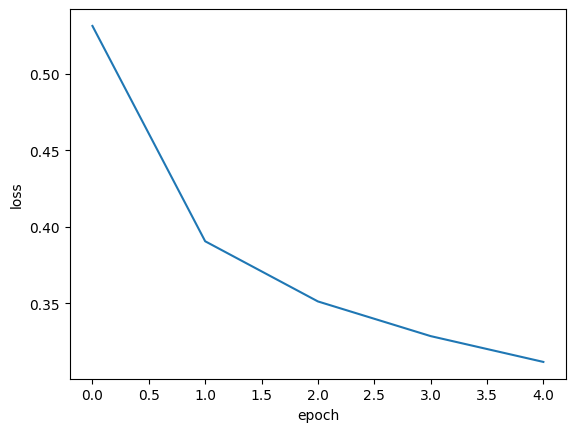

In [10]:
import matplotlib.pyplot as plt
# history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트로 맷플롯립으로 쉽게 그래프 처리가 가능하다.
plt.plot(history.history['loss'])
plt.xlabel('epoch')
# 파이썬 인덱스는 0부터 시작한다. 5개의 에포크가 0 ~ 4까지 x축에 표현한다.
plt.ylabel('loss')    # 손실된 값
plt.show()

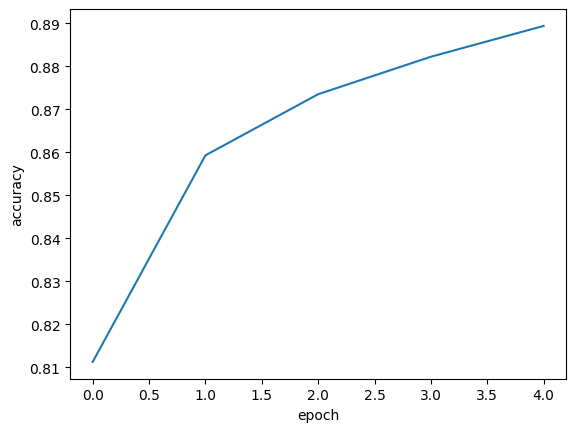

In [11]:
# 이번에는 정확도를 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 결과 분석 : 에포크마다 손실이 감소하고 정확도가 향상된다.

In [12]:
# 이번에는 에포크 횟수를 20번으로 늘려서 보자

model = model_fn()      # 위에서 만든 메서드로 모델 생성(3개층 입력층, 은닉층, 출력층)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

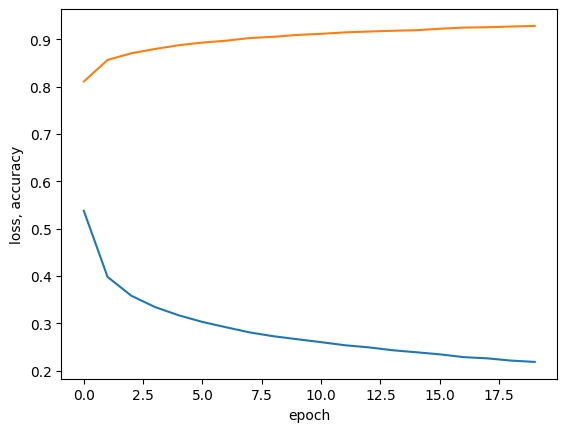

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.show()
# 손실이 잘 감소됨을 확인 하였지만 약간 조절이 필요하다.

검증손실

*  예전에 확률적 경사 하강법을 사용 했을 때 과대/과소 적합과 에포크 사이에 관계 부분도 있었다.

*  인공 신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 여기에도 적용된다.

*  에포크에 따른 과대적합, 과소적합을 파악하려면 훈련 세트 점수와 검증 세트에 대한 점수도 필요하다.

그래서 위에처럼 훈련세트와 손실과 정확도만 그러면 파악이 어렵다.

검증 손실을 이용해서 과대/과소 적합을 응용하겠다.

keypoint

*  손실을 사용하는 것과 정확도를 사용하는 것의 차이는?

*  인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수이다.

*  손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있는데 모델이 잘 훈련 되었는지 판단 하려면 정확도보다는 손실 함수의 값을 확인 하는 것이 더 좋은 방법이다.

In [14]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [15]:
print(history.history.keys())
# 정확도 accuracy, 손실 loss 값이 있다.
# 추가로 검증세트 정확도 val_accuracy, 검증세트 손실 val_loss가 나온다.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


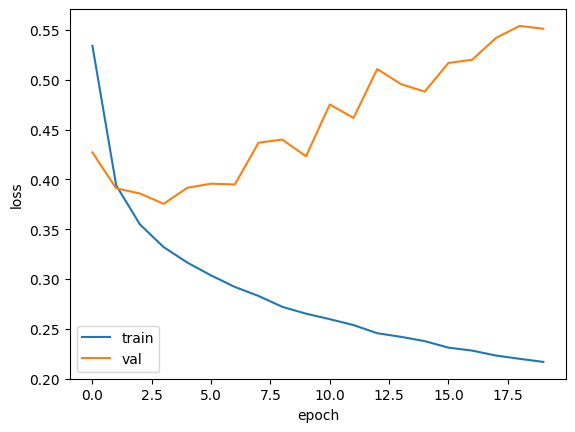

In [17]:
# 과대/ 과소 적합 문제로 조사하기 위해서 훈려손실, 검증 손실을 한 그래프에 그려서 비교해보자.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

결과 분석 : 초기에 검증 손실이 감소하다가 다섯 번째 에포크 마에 다시 상승하였다.

훈련 손실은 꾸준히 감소하기 때문에 과대 적합 모델이 만들어진다.

검증 손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고 검증 세트에 대한 정확도가 증가할 거 같다.

과대 적합을 막기 위한 방법으로 예전에 사용했던 규제방식대신에 신경망에 특화된 규제방법(드롭아웃) 을 나중에 해보자.

지금은 옵티마이져 하이퍼파라미터를 조절하여 과대 적합을 완화시켜본다

RMSprop 옵티마이져는 많은 문제에서 잘~ 동작합니다. -> 다른 방법으로는 Adam이 있죠

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


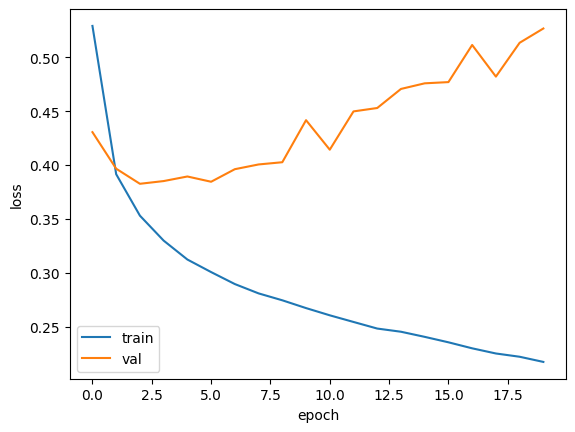

In [19]:
# 지금은 옵티마이져 하이퍼파라미터를 조절하여 과재 적합을 완화 시켜본다.
# RMSprop 옵티마이져는 많은 문제여서 잘 동작합니다 -> 다른 방법으로는 Adam이 있다

model = model_fn()
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


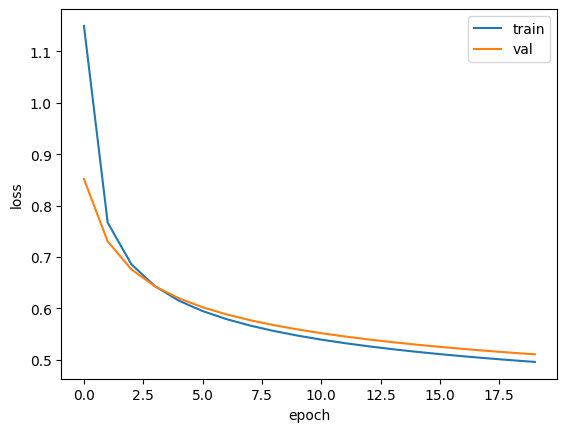

In [20]:
model = model_fn()
adagrad = keras.optimizers.Adagrad()      # Adagrad기법 차트로 보자.
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


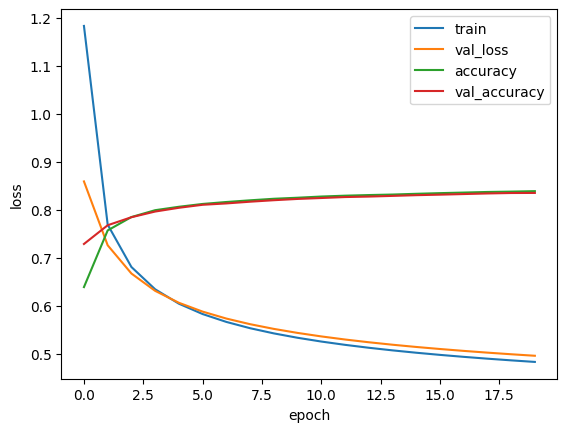

In [21]:
model = model_fn()
adagrad = keras.optimizers.Adagrad()      # Adagrad기법 차트로 보자.
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val_loss', 'accuracy', 'val_accuracy'])
plt.show()

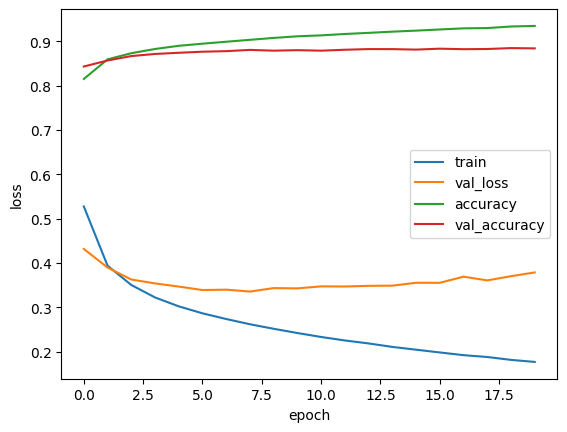

In [23]:
model = model_fn()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val_loss', 'accuracy', 'val_accuracy'])
plt.show()